<a href="https://colab.research.google.com/github/Randa1989/Demo/blob/main/EDA_on_Sudan_food_and_agriculture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization library 
import matplotlib.pyplot as plt # data visualization library
from matplotlib import style # import the "style" module from the Matplotlib data visualization library
from google.colab import files
import io
data=files.upload()

Saving prices_oct_nov_2022.csv to prices_oct_nov_2022.csv


In [4]:
df=pd.read_csv(io.StringIO(data['prices_oct_nov_2022.csv'].decode('utf-8')))

In [5]:
df.head()

,Unnamed: 0,Date,Pricing,Market,Product,Price,Change,Unit
0,0,2022-11-16,Retail,Khartoum,Guava,1000.0,0%,Kilogram
1,1,2022-11-15,Wholesale,Rabak,Donkey (male),150000.0,2.04%,Head
2,2,2022-11-15,Wholesale,Rabak,Horse,420000.0,0%,Head
3,3,2022-11-15,Wholesale,Rabak,Camels,325000.0,0%,Head
4,4,2022-11-15,Wholesale,Rabak,Goat (Noubian Male live 13-30kgs),26000.0,0%,Head


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3086 entries, 0 to 3085
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3086 non-null   int64  
 1   Date        3086 non-null   object 
 2   Pricing     3086 non-null   object 
 3   Market      3086 non-null   object 
 4   Product     3086 non-null   object 
 5   Price       3086 non-null   float64
 6   Change      3084 non-null   object 
 7   Unit        3086 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 193.0+ KB


In [7]:
df.shape

(3086, 8)

In [8]:
df.columns

Index(['Unnamed: 0', 'Date', 'Pricing', 'Market', 'Product', 'Price', 'Change',
       'Unit'],
      dtype='object')

In [9]:
df.describe()

,Unnamed: 0,Price
count,3086.000000,3.086000e+03
mean,1542.500000,4.658134e+04
std,890.995791,1.160070e+05
min,0.000000,3.143000e+01
25%,771.250000,9.000000e+02
50%,1542.500000,3.500000e+03
75%,2313.750000,3.800000e+04
max,3085.000000,1.500000e+06


In [10]:
df.isnull().sum()

Unnamed: 0    0
Date          0
Pricing       0
Market        0
Product       0
Price         0
Change        2
Unit          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df['Change'] = df['Change'].str.replace('%','')

In [13]:
df['Change'] = df['Change'].astype(float)


In [14]:
df['Change'].fillna(float(round(df['Change'].mean(),2)),inplace=True)


In [15]:
df.isnull().sum()


Unnamed: 0    0
Date          0
Pricing       0
Market        0
Product       0
Price         0
Change        0
Unit          0
dtype: int64

In [17]:
def month_to_quarter(month):
    if month in [1,2,3]:
        return 'Q1'
    elif month in [4,5,6]:
        return 'Q2'
    elif month in [7,8,9]:
        return 'Q3'
    else:
        return 'Q4'

In [19]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Quarter'] =  df['Date'].dt.quarter
df['Year'] =  df['Date'].dt.year
df['Month_name'] =  df['Date'].dt.month_name()
df['Month_no'] = df['Date'].dt.month
df['Day_name'] = df['Date'].dt.day_name()
df['Day_no'] = df['Date'].dt.day
df['Quarter_name'] = df['Month_no'].apply(month_to_quarter)

In [20]:
df

,Unnamed: 0,Date,Pricing,Market,Product,Price,Change,Unit,Quarter,Year,Month_name,Month_no,Day_name,Day_no,Quarter_name
0,0,2022-11-16,Retail,Khartoum,Guava,1000.0,0.00,Kilogram,4,2022,November,11,Wednesday,16,Q4
1,1,2022-11-15,Wholesale,Rabak,Donkey (male),150000.0,2.04,Head,4,2022,November,11,Tuesday,15,Q4
2,2,2022-11-15,Wholesale,Rabak,Horse,420000.0,0.00,Head,4,2022,November,11,Tuesday,15,Q4
3,3,2022-11-15,Wholesale,Rabak,Camels,325000.0,0.00,Head,4,2022,November,11,Tuesday,15,Q4
4,4,2022-11-15,Wholesale,Rabak,Goat (Noubian Male live 13-30kgs),26000.0,0.00,Head,4,2022,November,11,Tuesday,15,Q4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3081,3081,2022-10-18,Wholesale,Kassala,Wheat Grain,42000.0,0.00,Standard Sack ~90kg,4,2022,October,10,Tuesday,18,Q4
3082,3082,2022-10-18,Wholesale,Kassala,Sorghum - Aklamoy,46000.0,0.00,Standard Sack ~90kg,4,2022,October,10,Tuesday,18,Q4
3083,3083,2022-10-18,Wholesale,Kassala,Sorghum (Tabat),47000.0,0.00,Standard Sack ~90kg,4,2022,October,10,Tuesday,18,Q4
3084,3084,2022-10-18,Wholesale,Kassala,Millet,54000.0,0.00,Standard Sack ~90kg,4,2022,October,10,Tuesday,18,Q4


In [21]:
df.describe()


,Unnamed: 0,Price,Change,Quarter,Year,Month_no,Day_no
count,3086.000000,3.086000e+03,3086.000000,3086.0,3086.0,3086.000000,3086.000000
mean,1542.500000,4.658134e+04,-0.216497,4.0,2022.0,10.413480,16.634802
std,890.995791,1.160070e+05,12.898252,0.0,0.0,0.492537,9.653971
min,0.000000,3.143000e+01,-93.040000,4.0,2022.0,10.000000,1.000000
25%,771.250000,9.000000e+02,0.000000,4.0,2022.0,10.000000,8.000000
50%,1542.500000,3.500000e+03,0.000000,4.0,2022.0,10.000000,19.000000
75%,2313.750000,3.800000e+04,0.000000,4.0,2022.0,11.000000,25.000000
max,3085.000000,1.500000e+06,260.000000,4.0,2022.0,11.000000,31.000000


In [22]:
df.nunique()


Unnamed: 0      3086
Date              28
Pricing            2
Market            24
Product           99
Price            583
Change           584
Unit              20
Quarter            1
Year               1
Month_name         2
Month_no           2
Day_name           7
Day_no            28
Quarter_name       1
dtype: int64

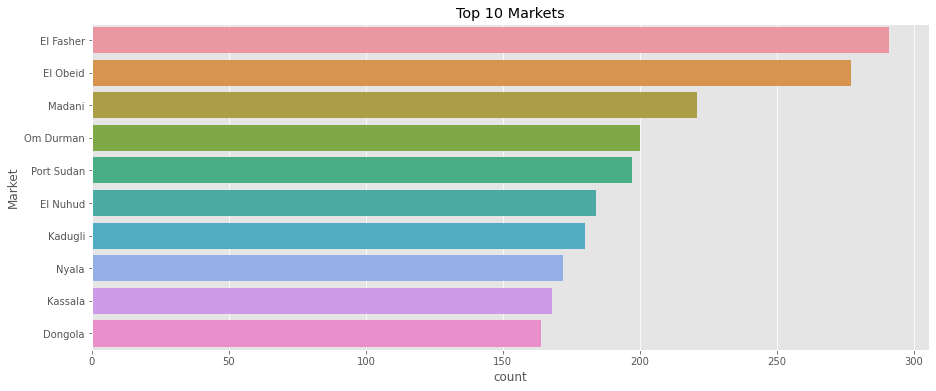

In [23]:
top_10_markets = df['Market'].value_counts().nlargest(10)
plt.figure(figsize=(15,6))
sns.countplot(data=df, order=top_10_markets.index, y='Market')
plt.title('Top 10 Markets')
plt.show()

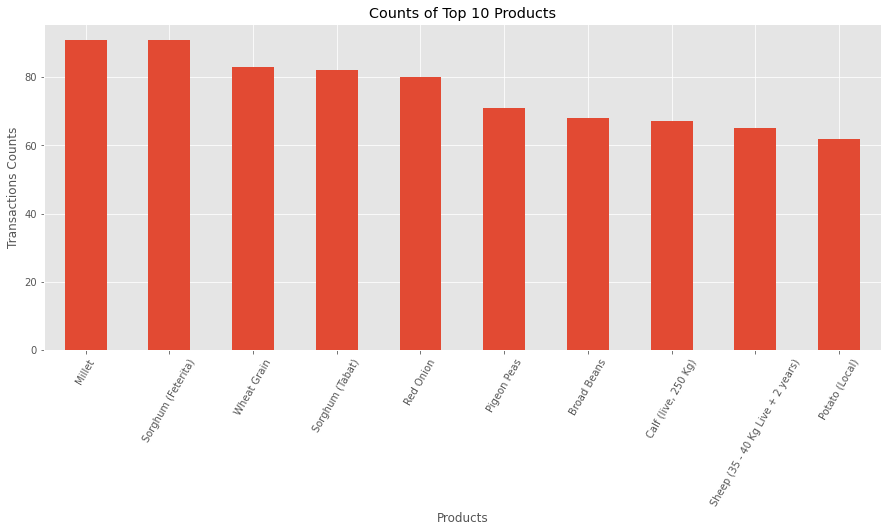

In [24]:
plt.figure(figsize=(15,6))
df['Product'].value_counts().nlargest(10).plot(kind='bar')
plt.xticks(rotation=60)
plt.xlabel('Products')
plt.ylabel('Transactions Counts')
plt.title('Counts of Top 10 Products')
plt.show()

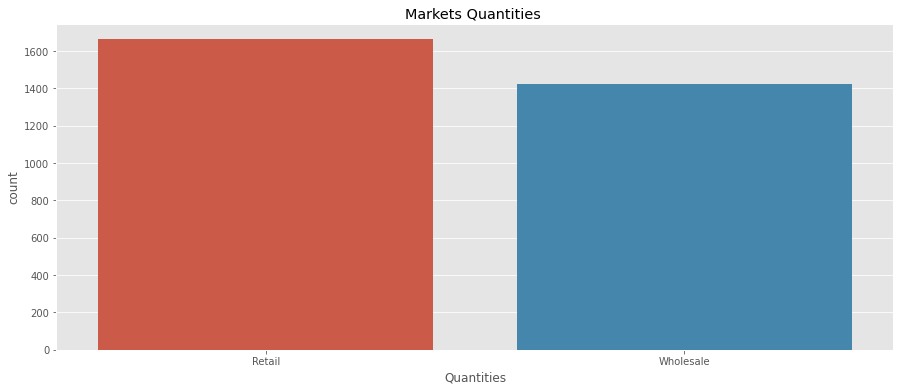

In [25]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Pricing')
plt.title('Markets Quantities ')
plt.xlabel('Quantities')
plt.show()

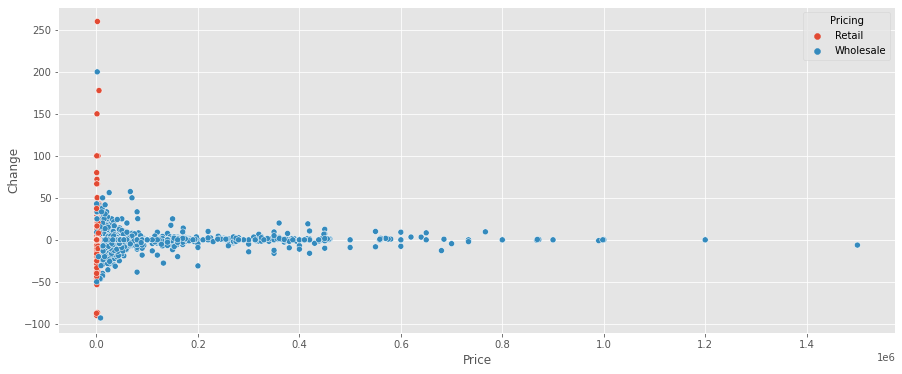

In [26]:
plt.figure(figsize=(15,6))
scatt = sns.scatterplot(data=df, x='Price', y='Change', hue='Pricing')
# plt.ylabel('Price Change')
# plt.title('Prices VS Prices Change')
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Change'>

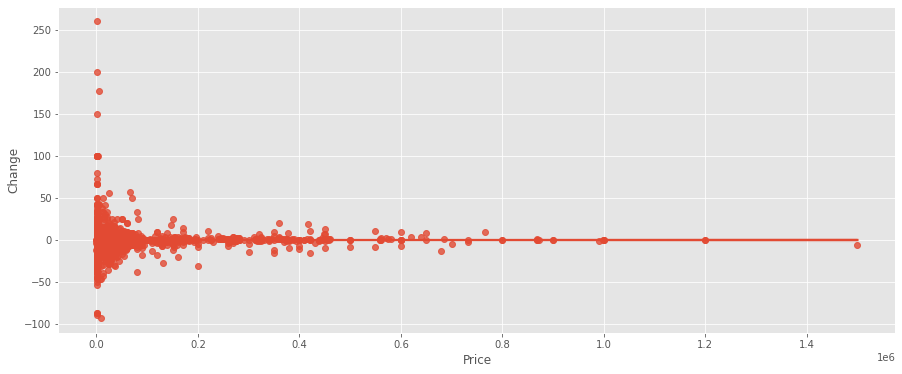

In [27]:
plt.figure(figsize=(15,6))
sns.regplot(data=df, x='Price', y='Change')

In [28]:
# X = df.drop('Change', axis=1)
# y = df['Change']
dummies =  pd.get_dummies(df['Pricing'])
dummies.head()

,Retail,Wholesale
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [29]:
merged = pd.concat([df,dummies], axis='columns')
merged.head()

,Unnamed: 0,Date,Pricing,Market,Product,Price,Change,Unit,Quarter,Year,Month_name,Month_no,Day_name,Day_no,Quarter_name,Retail,Wholesale
0,0,2022-11-16,Retail,Khartoum,Guava,1000.0,0.00,Kilogram,4,2022,November,11,Wednesday,16,Q4,1,0
1,1,2022-11-15,Wholesale,Rabak,Donkey (male),150000.0,2.04,Head,4,2022,November,11,Tuesday,15,Q4,0,1
2,2,2022-11-15,Wholesale,Rabak,Horse,420000.0,0.00,Head,4,2022,November,11,Tuesday,15,Q4,0,1
3,3,2022-11-15,Wholesale,Rabak,Camels,325000.0,0.00,Head,4,2022,November,11,Tuesday,15,Q4,0,1
4,4,2022-11-15,Wholesale,Rabak,Goat (Noubian Male live 13-30kgs),26000.0,0.00,Head,4,2022,November,11,Tuesday,15,Q4,0,1


In [30]:
df_final = merged.drop(['Date','Month_name','Pricing','Market','Product','Unit','Day_name','Quarter_name'],axis='columns')
df_final.head()

,Unnamed: 0,Price,Change,Quarter,Year,Month_no,Day_no,Retail,Wholesale
0,0,1000.0,0.00,4,2022,11,16,1,0
1,1,150000.0,2.04,4,2022,11,15,0,1
2,2,420000.0,0.00,4,2022,11,15,0,1
3,3,325000.0,0.00,4,2022,11,15,0,1
4,4,26000.0,0.00,4,2022,11,15,0,1


In [31]:
X = df_final.drop(['Change','Quarter','Year','Day_no'], axis='columns')
y = df_final['Change']

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3,random_state=101)

In [33]:
len(df_final)

3086

In [34]:
len(X_train)

2160

In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [36]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
model.predict(X_test)

array([-5.66304924e-01,  1.20487538e+00, -1.10104579e+00, -1.20907314e+00,
        5.89730977e-01, -7.06690051e-01, -1.07242642e+00, -7.44257777e-01,
        4.14818538e-01, -1.23335363e+00,  1.02996218e+00,  1.42500844e-01,
       -8.02965922e-01,  9.09092962e-02, -1.74959211e-01, -4.51272850e-01,
       -5.75674886e-02,  1.03433729e+00, -5.21192292e-01, -6.55169653e-01,
       -5.20521641e-01, -6.20179137e-02,  5.74920131e-01,  1.32402906e+00,
        7.21101703e-01, -1.44121698e+00, -7.39673229e-01,  7.54757755e-01,
        5.71650364e-01,  1.38913932e-01, -4.42192751e-01, -4.56537396e-01,
       -1.34501462e+00,  1.30090397e-01,  3.87850736e-01, -1.56094222e+00,
       -5.89320741e-01,  1.07660379e+00, -7.82286339e-01,  6.07007307e-01,
       -6.96022119e-01, -9.22139369e-01, -7.40315939e-01,  1.98419852e-01,
       -8.40502838e-01, -3.36409433e-01, -3.80946996e-01,  2.11166026e-01,
        1.19049672e+00,  5.88287547e-01,  3.62932169e-03,  7.31831565e-01,
       -5.78809345e-01, -

In [38]:
model.score(X,y)

0.0022224529942577176

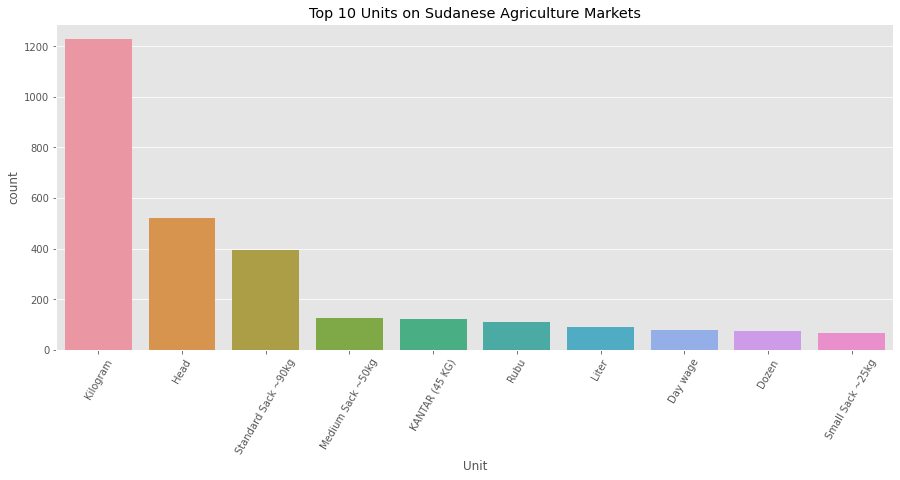

In [39]:
top_10_unit = df['Unit'].value_counts().nlargest(10)
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='Unit', order=top_10_unit.index)
plt.xticks(rotation=60)
plt.title('Top 10 Units on Sudanese Agriculture Markets')
plt.show()

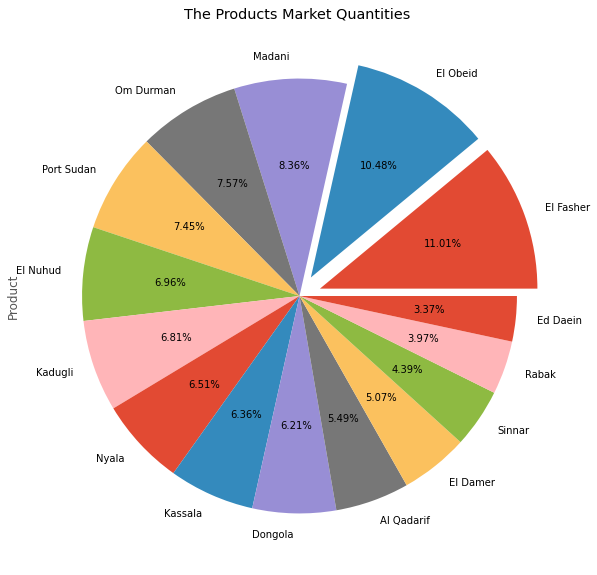

In [40]:
plt.figure(figsize=(20,10))
explode = [0.1, 0.1, 0, 0,0,0,0,0,0,0,0,0,0,0,0]
df.groupby('Market')['Product'].count().sort_values(ascending=False).nlargest(15).\
plot(kind='pie', autopct='%.2f%%', explode=explode)
plt.title('The Products Market Quantities ')
plt.show()

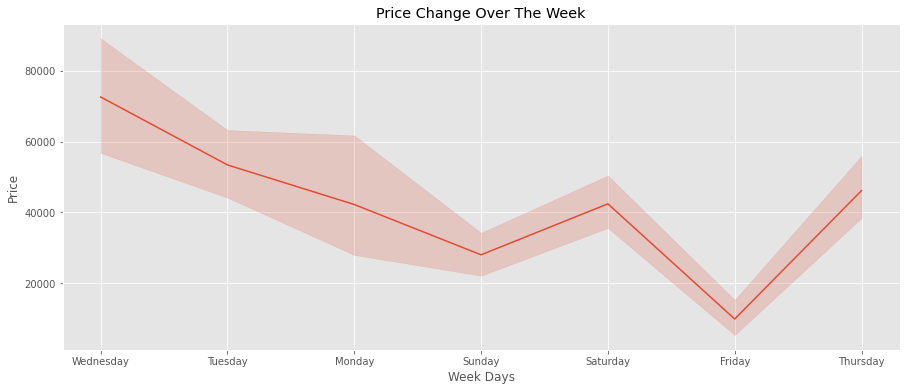

In [41]:
plt.figure(figsize=(15,6))
sns.lineplot(data=df, x='Day_name', y='Price')
plt.title('Price Change Over The Week')
plt.xlabel('Week Days')
plt.show()

***conclusion***


The largest quantities of goods, food, and agricultural products in the market are found in the cities of El Fasher and El Obeid.
The most commonly used units of measurement in Sudanese markets are kilograms and heads (referring to livestock).
Friday is weekend